<a href="https://colab.research.google.com/github/adrianciemerych/telco_customer_churn_project/blob/main/churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/churn_project/churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset has 21 columns and each of them doesn't have null values.

In column TotalCharges we can see object data type when it should be float.

In [4]:
# Checking count of values in individual columns
for col in df.columns:
  print(df[col].value_counts())
  print()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                   

We can see that the customerID column retains 7043 unique rows so it is unnecessary for us.

It is correct relationship between column PhoneService and MultipleLines - respectively values "No" in first column and "No phone service" in second column have equal count - 682

Same as above, correct relationship is also between column InternetService and columns OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In column TotalCharges 11 rows do not have a numeric value. Probably it is reason why dtype of column isn't float

In [5]:
# Removing customerID column
df = df.drop('customerID', axis = 1)

# Printing info about non-numerical values in TotalCharges
print("Values that are not numbers in TotalCharges: \n",
      list(df.sort_values('TotalCharges').head(11)['TotalCharges']))

Values that are not numbers in TotalCharges: 
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [6]:
df.sort_values('TotalCharges').head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In rows that are inconsistent in term of TotalCharges column, we can see tenure equals to 0. Also the contract is signed for at least on one year and in target column, everywhere churn = 'No', so contract couldn't be broken. These informations may lead to the conclusion that the customers haven't had the opportunity to make a payment yet.

In [7]:
# Replacing string - ' ' to 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : 0 if x == ' ' else x)
df['TotalCharges'].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
# Converting column dtypes to int, float or category
for col in df.columns:
  if col in ['tenure']:
    df[col] = df[col].astype(int)
  elif col in ['MonthlyCharges', 'TotalCharges']:
    df[col] = df[col].astype(float)
  else:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [10]:
# Checking about incompatibilities between months as a customer multiplied by monthly charges
# and TotalCharges
df[(df['tenure']*df['MonthlyCharges'] < 0.5*df['TotalCharges']) |
   (df['tenure']*df['MonthlyCharges'] > 1.5*df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


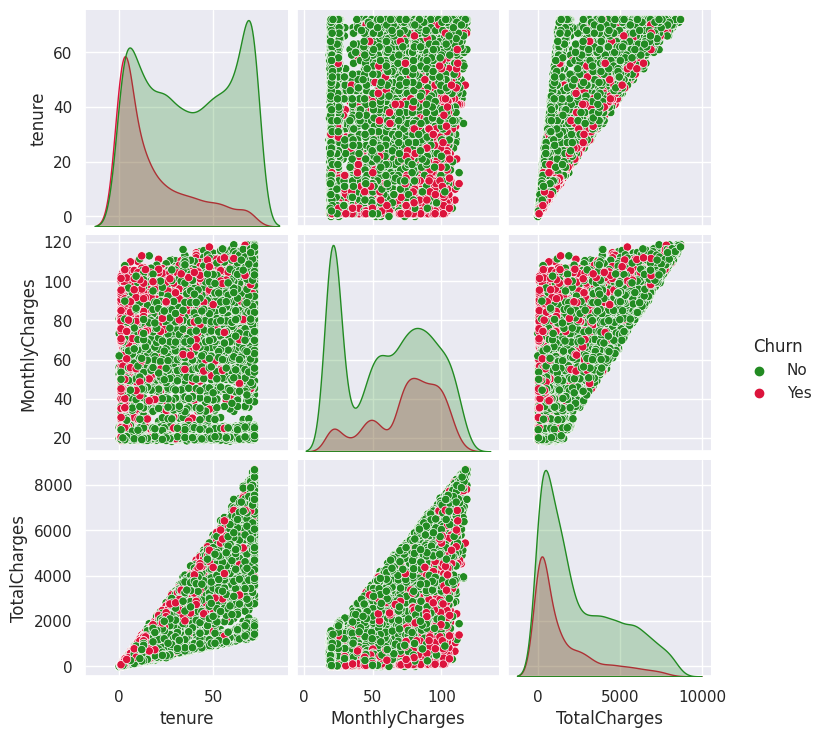

In [82]:
sns.pairplot(df, hue = 'Churn', palette = ['#228B22', '#DC143C'])

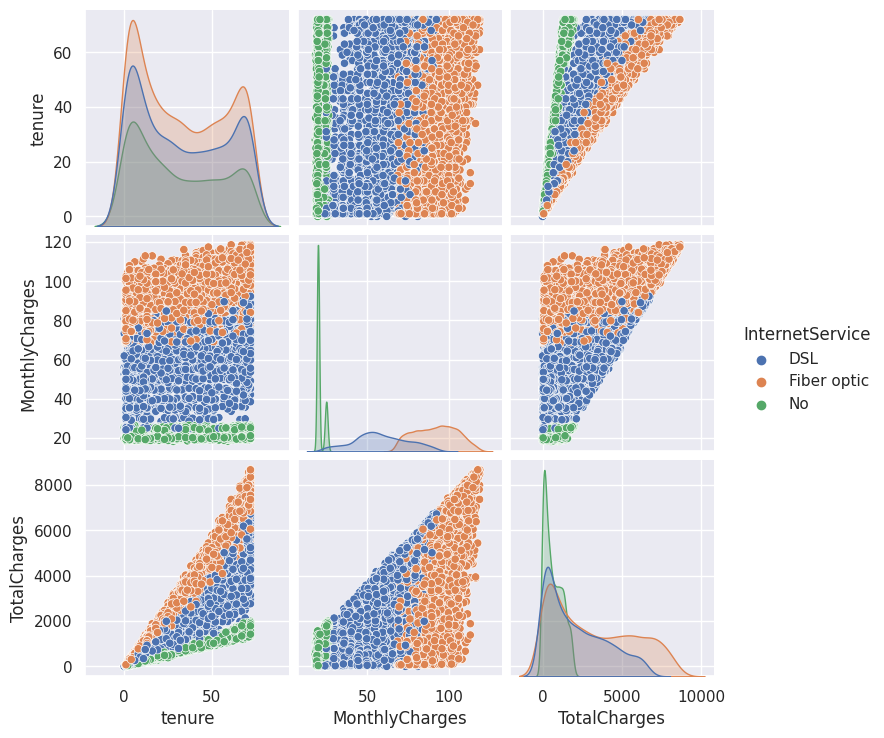

In [71]:
sns.pairplot(df, hue = 'InternetService')

The dataset has 3 numerical variables - tenure, MonthlyCharges and TotalCharges.

The first one indicates that the higher number of months a customer has stayed with the company is, the lower chance of a customer leaving.

The higher monthly charges increase risk of customer churn

Monthly Charges are the smallest when a customer doesn't have Internet Service.
The most expensive but also the most popular internet service is Fiber optic

In [65]:
df.describe(include = 'category')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


1. The dataset has 3 numerical variables.

<ipython-input-177-a63de6920560>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, index].set_xticklabels(ax[1,index].get_xticklabels(), rotation = 45)
<ipython-input-177-a63de6920560>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, index].set_xticklabels(ax[1,index].get_xticklabels(), rotation = 45)
<ipython-input-177-a63de6920560>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, index].set_xticklabels(ax[1,index].get_xticklabels(), rotation = 45)


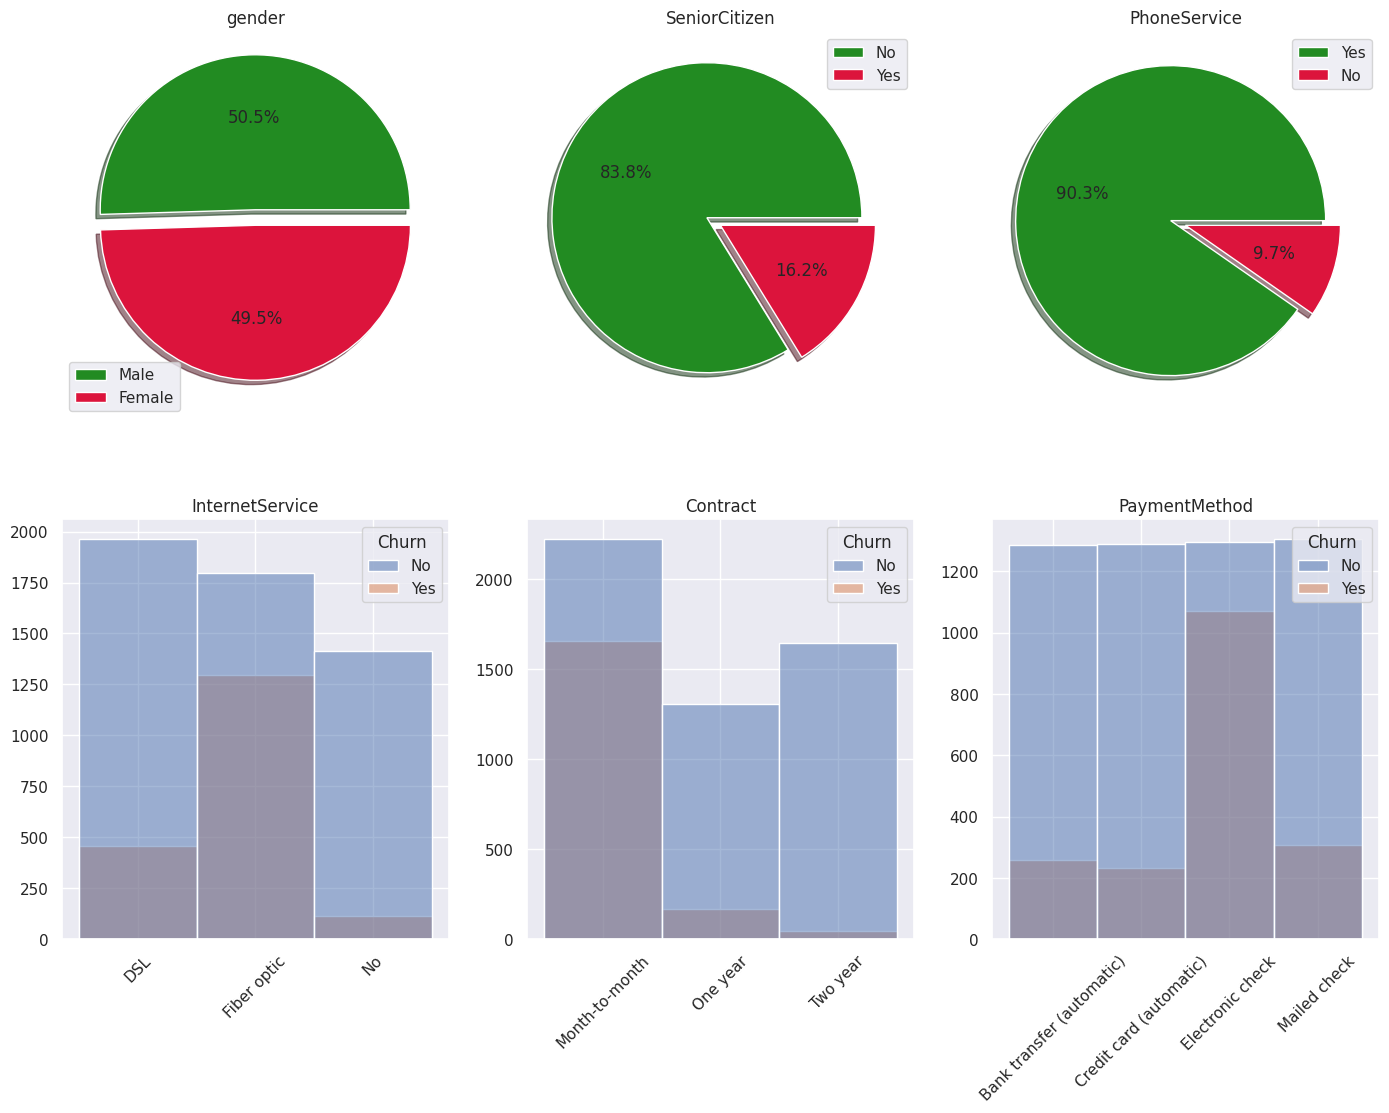

In [177]:
fig, ax = plt.subplots(2,3, figsize = (17,12))
for index, col in enumerate(['gender', 'SeniorCitizen', 'PhoneService']):
  df[col].value_counts().plot(kind = 'pie', ax = ax[0,index], shadow = True,
                              title = col, colors = ['#228B22', '#DC143C'],
                              explode = [0.1, 0], autopct = '%1.1f%%',
                              labels = ['', ''], ylabel = '')
for index, col in enumerate(['InternetService', 'Contract', 'PaymentMethod']):
  sns.histplot(data = df, x = col, ax = ax[1, index], hue = 'Churn')
  ax[1, index].title.set_text(col)
  ax[1, index].set_xlabel('')
  ax[1, index].set_ylabel('')
  ax[1, index].set_xticklabels(ax[1,index].get_xticklabels(), rotation = 45)

ax[0, 0].legend(['Male', 'Female'])
ax[0, 1].legend(['No', 'Yes'])
ax[0, 2].legend(['Yes', 'No'])
